In [ ]:
install.packages('gsheet')
library(tidyverse)
library(cowplot)
library(scales)
library(gsheet)
library(repr)
data <- gsheet2tbl('docs.google.com/spreadsheets/d/1MhyB5hxvmZCIAMTbdSscGI4yIUbM2Au_Hkdkx9dx_LM/edit?usp=sharing')


In [2]:
head(data,6)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


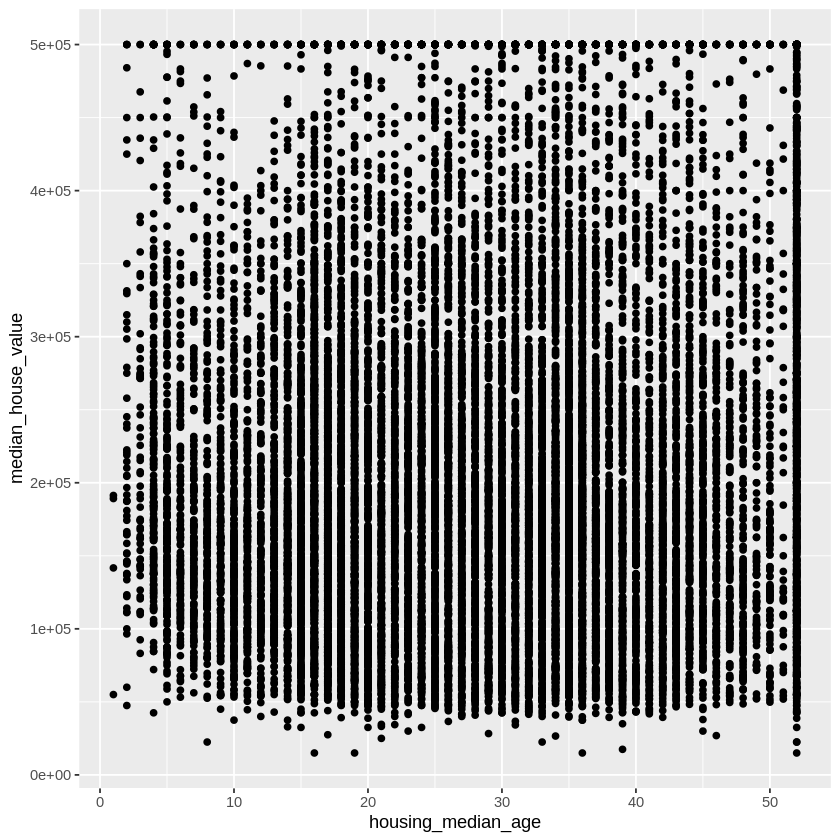

In [3]:
age_vs_value_plot <- ggplot(data,aes(x=housing_median_age,y=median_house_value)) +
    geom_point()
age_vs_value_plot

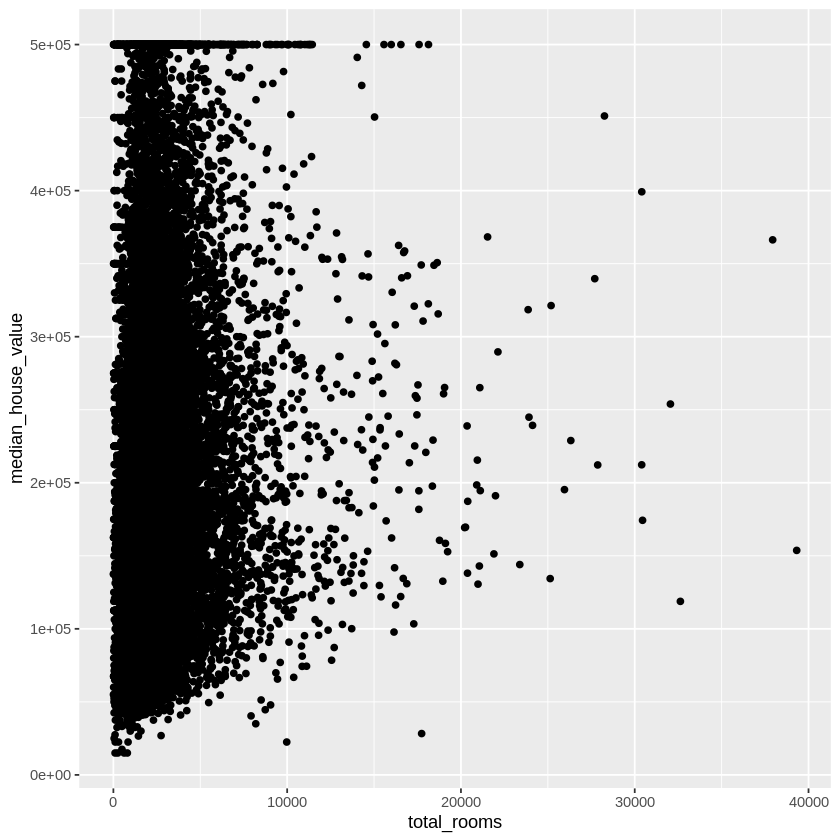

In [4]:
age_vs_space_plot <- ggplot(data,aes(x=total_rooms,y=median_house_value)) +
    geom_point()
age_vs_space_plot

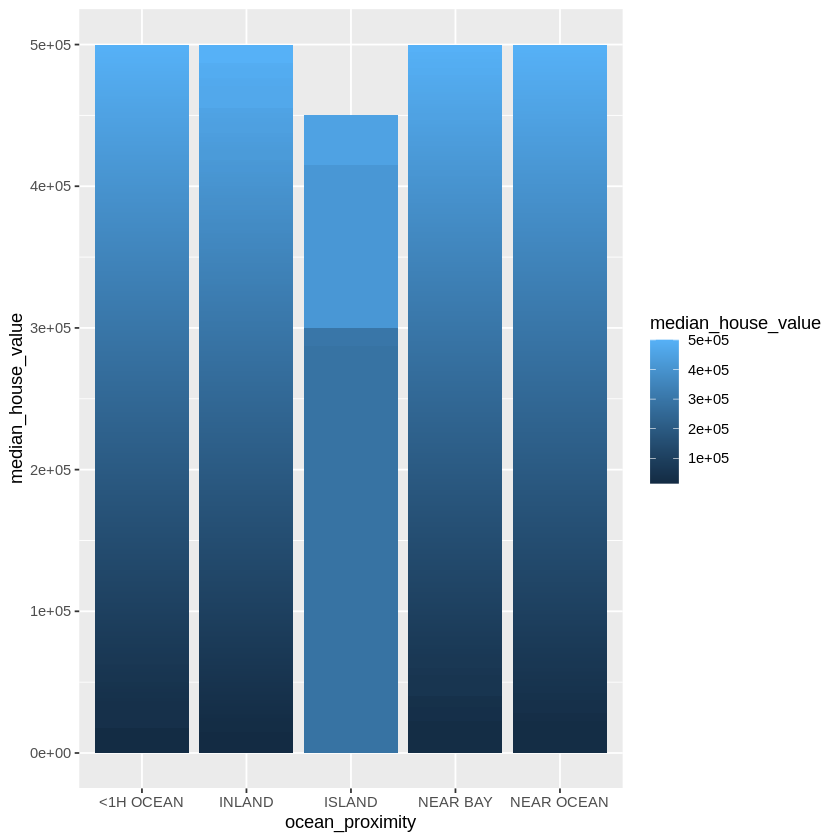

In [5]:
data1 <- data %>%
    arrange(desc(median_house_value))
nearness_to_bay_plot <- ggplot(data1, aes(x=ocean_proximity,y=median_house_value,fill = median_house_value)) +
    geom_bar(stat="identity",position = "dodge") 
nearness_to_bay_plot

$breaks
 [1]      0  50000 100000 150000 200000 250000 300000 350000 400000 450000
[11] 500000 550000

$counts
 [1]    9  334 1206 2531 1815 1142  727  443  244  153  532

$density
 [1] 1.970228e-08 7.311734e-07 2.640105e-06 5.540718e-06 3.973292e-06
 [6] 2.500000e-06 1.591506e-06 9.697898e-07 5.341506e-07 3.349387e-07
[11] 1.164623e-06

$mids
 [1]  25000  75000 125000 175000 225000 275000 325000 375000 425000 475000
[11] 525000

$xname
[1] "close_to_ocean$median_house_value"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

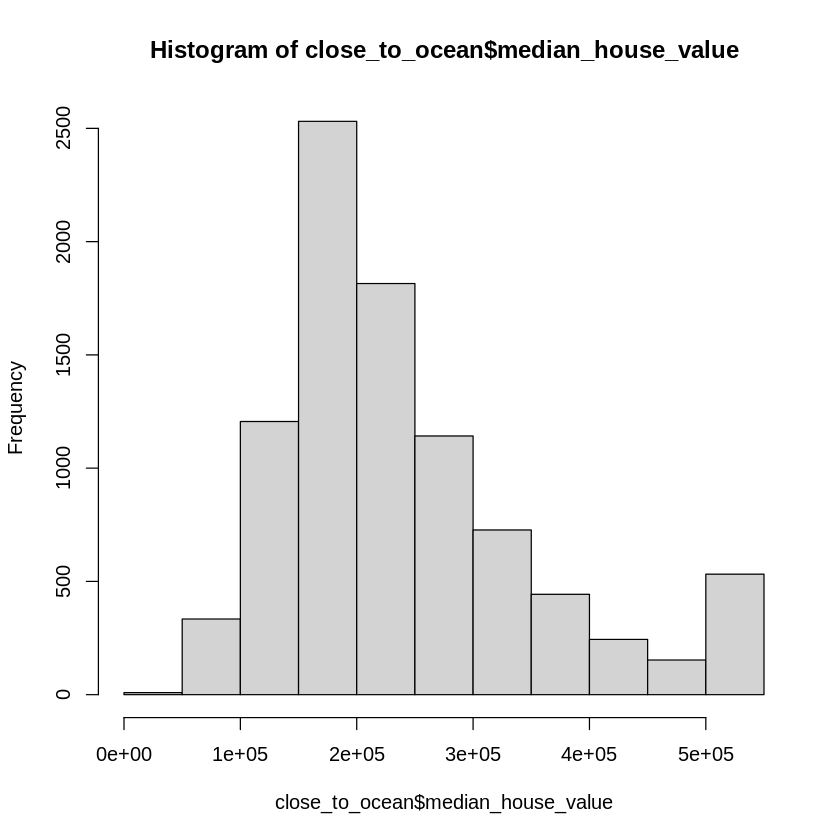

In [6]:
close_to_ocean <- filter(data, ocean_proximity == "<1H OCEAN")

close_to_ocean_plot <- hist(close_to_ocean$median_house_value)
close_to_ocean_plot

In [ ]:
library(tidyverse)
library(cowplot)
library(scales)
library(gsheet)
library(repr)
data <- gsheet2tbl('docs.google.com/spreadsheets/d/1nNlzfwXkHVk2i946pgf3247KT2vqCDfHZjrBjT-losg/edit?usp=sharing')
numeric_data <- select_if(data,is.numeric)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


[1] "Id"            "MSSubClass"    "MSZoning"      "LotFrontage"  
 [5] "LotArea"       "Street"        "Alley"         "LotShape"     
 [9] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
[13] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[17] "HouseStyle"    "OverallQual"   "OverallCond"   "YearBuilt"    
[21] "YearRemodAdd"  "RoofStyle"     "RoofMatl"      "Exterior1st"  
[25] "Exterior2nd"   "MasVnrType"    "MasVnrArea"    "ExterQual"    
[29] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[33] "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2" 
[37] "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"   "Heating"      
[41] "HeatingQC"     "CentralAir"    "Electrical"    "1stFlrSF"     
[45] "2ndFlrSF"      "LowQualFinSF"  "GrLivArea"     "BsmtFullBath" 
[49] "BsmtHalfBath"  "FullBath"      "HalfBath"      "BedroomAbvGr" 
[53] "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd"  "Functional"   
[57] "Fireplaces"    "FireplaceQu"   "GarageType"    "GarageYrBlt"  
[61] "GarageFinish"  "GarageCars"    "GarageArea"    "GarageQual"   
[65] "GarageCond"    "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"  
[69] "EnclosedPorch" "3SsnPorch"     "ScreenPorch"   "PoolArea"     
[73] "PoolQC"        "Fence"         "MiscFeature"   "MiscVal"      
[77] "MoSold"        "YrSold"        "SaleType"      "SaleCondition"
[81] "SalePrice"

Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,⋯,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,60,65,8450,7,5,2003,2003,196,706,⋯,0,61,0,0,0,0,0,2,2008,208500
2,20,80,9600,6,8,1976,1976,0,978,⋯,298,0,0,0,0,0,0,5,2007,181500
3,60,68,11250,7,5,2001,2002,162,486,⋯,0,42,0,0,0,0,0,9,2008,223500
4,70,60,9550,7,5,1915,1970,0,216,⋯,0,35,272,0,0,0,0,2,2006,140000
5,60,84,14260,8,5,2000,2000,350,655,⋯,192,84,0,0,0,0,0,12,2008,250000
6,50,85,14115,5,5,1993,1995,0,732,⋯,40,30,0,320,0,0,700,10,2009,143000


[1] "Id"            "MSSubClass"    "LotFrontage"   "LotArea"      
 [5] "OverallQual"   "OverallCond"   "YearBuilt"     "YearRemodAdd" 
 [9] "MasVnrArea"    "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"    
[13] "TotalBsmtSF"   "1stFlrSF"      "2ndFlrSF"      "LowQualFinSF" 
[17] "GrLivArea"     "BsmtFullBath"  "BsmtHalfBath"  "FullBath"     
[21] "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr"  "TotRmsAbvGrd" 
[25] "Fireplaces"    "GarageYrBlt"   "GarageCars"    "GarageArea"   
[29] "WoodDeckSF"    "OpenPorchSF"   "EnclosedPorch" "3SsnPorch"    
[33] "ScreenPorch"   "PoolArea"      "MiscVal"       "MoSold"       
[37] "YrSold"        "SalePrice"

In [4]:
only_averageable_data <- numeric_data %>%
    select(LotArea , OverallQual , OverallCond , GrLivArea, GarageArea , WoodDeckSF , OpenPorchSF , SalePrice)

average_for_each <- only_averageable_data %>%
    summarise_all(mean,na.rm =TRUE)
average_for_each

LotArea,OverallQual,OverallCond,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10516.83,6.099315,5.575342,1515.464,472.9801,94.24452,46.66027,180921.2


Warning message:
“Removed 81 rows containing missing values (geom_point).”


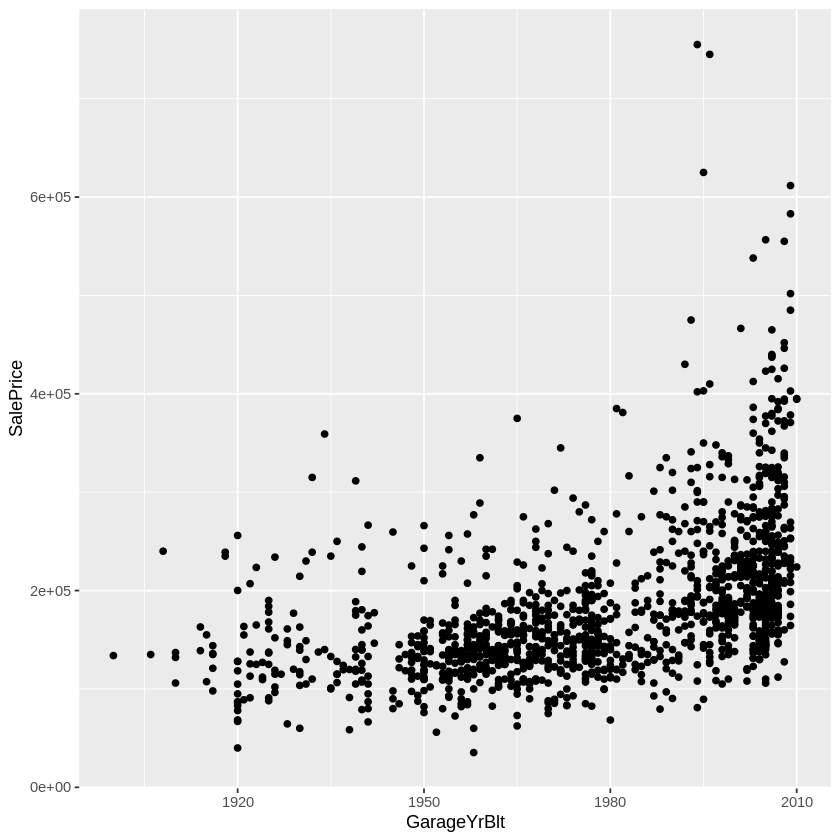

In [24]:
exterior_plot<- ggplot(data, aes(x= GarageYrBlt, y=SalePrice) ) + geom_point()
exterior_plot

In [ ]:
exterior_plot<- ggplot(data, aes(x= Exterior2nd, y=SalePrice) ) + geom_point()
exterior_plot

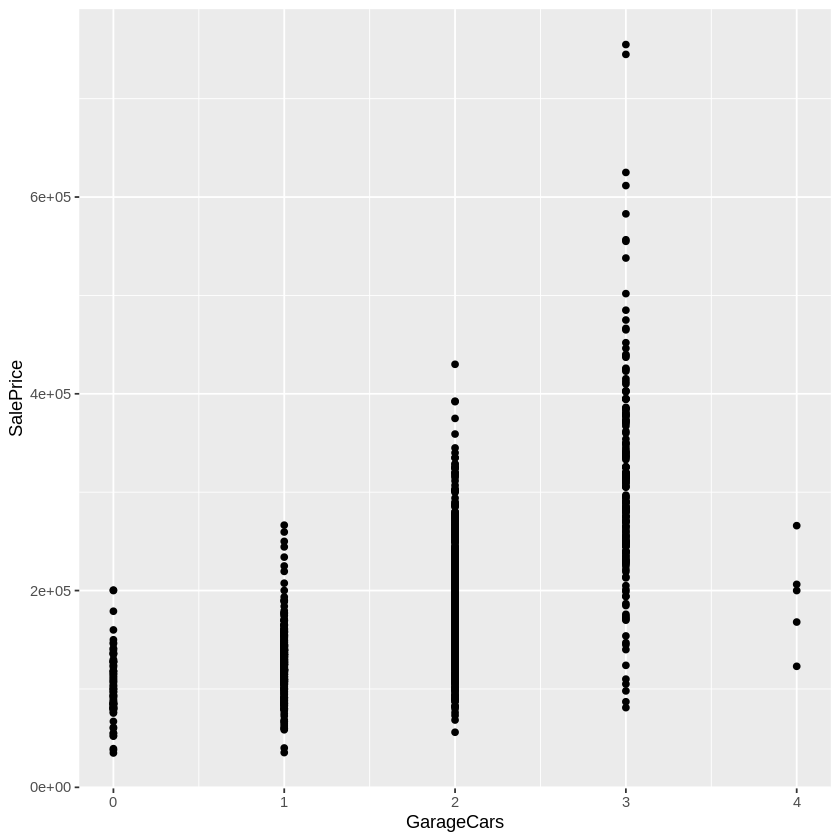

In [8]:
exterior_plot<- ggplot(data, aes(x= GarageCars, y=SalePrice) ) + geom_point()
exterior_plot

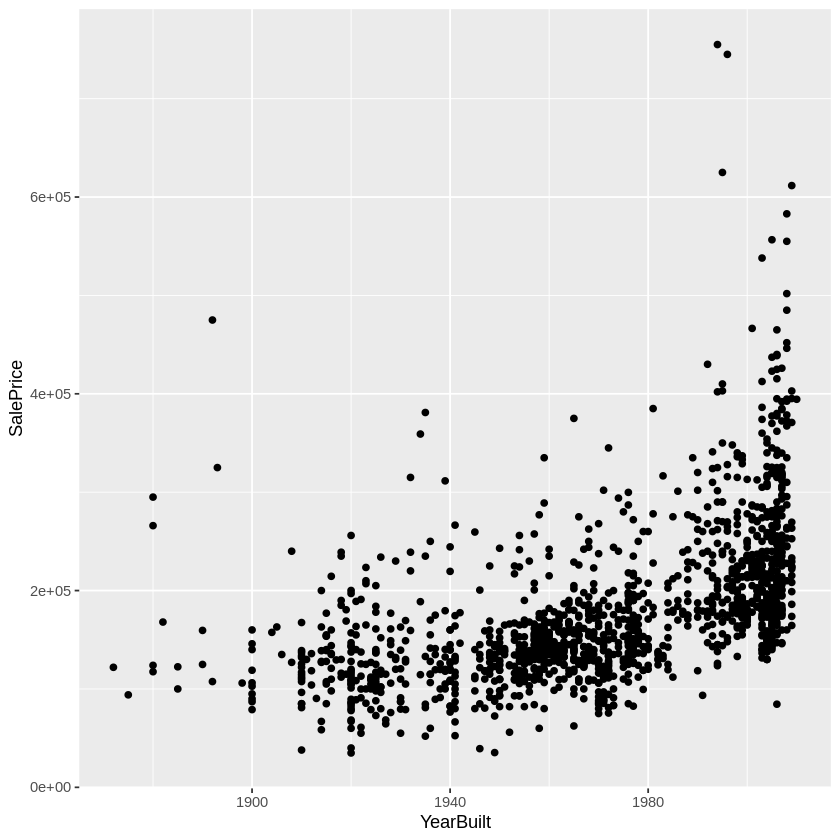

In [11]:
exterior_plot<- ggplot(data, aes(x=YearBuilt , y=SalePrice) ) + geom_point()
exterior_plot

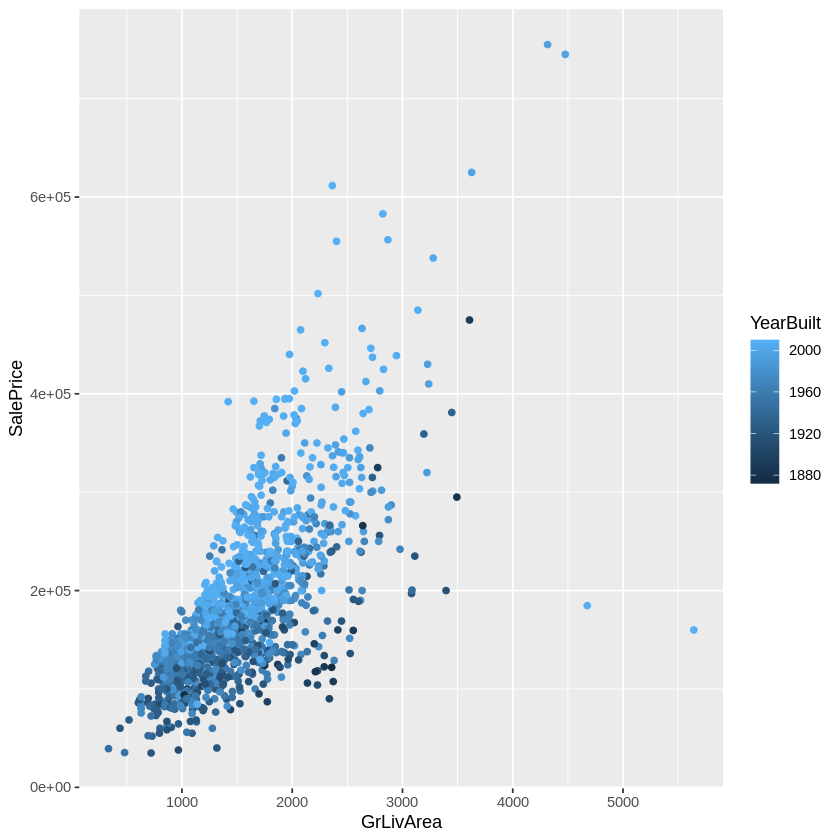

In [23]:
exterior_plot<- ggplot(data, aes(x=GrLivArea , y=SalePrice, color= YearBuilt) ) + geom_point()
exterior_plot

In [1]:
adsfaslkdfmalkdf

ERROR: Error in eval(expr, envir, enclos): object 'adsfaslkdfmalkdf' not found
